Suicides in India 2001-2012
---

In [1]:
import pandas as pd
import matplotlib.pyplot
import PIL.Image as Image

In [2]:
main_df = pd.read_csv('sucideRateInIndia.csv') 
df=main_df.copy() #Making a copy main dataset
print(df.shape)

(237519, 7)


In [3]:
df.isna().sum() # Checking Null Values

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [4]:
df.sample(20) # Getting Random Records

,State,Year,Type_code,Type,Gender,Age_group,Total
222877,Uttar Pradesh,2011,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
213880,Tripura,2007,Causes,Professional/Career Problem,Female,15-29,0
12743,Andhra Pradesh,2011,Means_adopted,By Drowning,Female,45-59,52
160141,Mizoram,2009,Causes,Illness (Aids/STD),Female,60+,0
228178,Uttarakhand,2008,Causes,Unemployment,Male,60+,0
164624,Nagaland,2005,Causes,Illness (Aids/STD),Male,60+,0
153256,Meghalaya,2009,Causes,Divorce,Male,15-29,0
57875,Daman & Diu,2007,Professional_Profile,House Wife,Female,60+,0
177180,Puducherry,2003,Means_adopted,By Other means (please specify),Female,60+,0
5613,A & N Islands,2011,Causes,Suspected/Illicit Relation,Female,0-14,0


In [5]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df[df['Year']==2012].shape

(19799, 7)

In [8]:
df['Year'].unique() # Checking Unique Values from Year col.

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [9]:
df['Type'].nunique() # Getting Total Number of unique categories 

69

In [10]:
df['Type'].value_counts() # Sorting the values w.r.t counts in the dataset

Others (Please Specify)                           7263
Illness (Aids/STD)                                4200
By Drowning                                       4200
By touching electric wires                        4200
By Machine                                        4200
                                                  ... 
Graduate                                           912
Middle                                             912
Bankruptcy or Sudden change in Economic Status     350
Not having Children (Barrenness/Impotency          350
By Other means                                     350
Name: Type, Length: 69, dtype: int64

In [11]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [12]:
df_1 = df[df['Total']>=1]

In [13]:
df_1.groupby('Total')['State'].value_counts().sort_values(ascending=False).head(10)

Total  State           
1      Bihar               720
       Delhi (Ut)          711
       Jammu & Kashmir     692
       Himachal Pradesh    674
       Goa                 673
       Punjab              671
       Uttarakhand         658
       Jharkhand           624
       Chhattisgarh        599
       Uttar Pradesh       563
Name: State, dtype: int64

In [14]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [15]:
df.groupby('State')['Total'].sum().sort_values(ascending=False)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

In [16]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [17]:
df['State']!='Total (All India)'

0         True
1         True
2         True
3         True
4         True
          ... 
237514    True
237515    True
237516    True
237517    True
237518    True
Name: State, Length: 237519, dtype: bool

In [18]:
df.shape

(237519, 7)

In [19]:
# Updating Dataset to remove the following Values from the Records
df1 = df[df['State']!='Total (All India)']
df2 = df1[df1['State']!='Total (States)']
df3 = df2[df2['State']!='Total (Uts)']

In [20]:
df1.shape, df2.shape, df3.shape # some records getting drop with new dataset 

((237207, 7), (236895, 7), (236583, 7))

In [21]:
# Out of total number of states we are consedering the top 24 sates
df3.groupby('State')['Total'].sum().sort_values(ascending=False).head(24).keys()
top_24_states = ['Maharashtra', 'West Bengal', 'Tamil Nadu', 'Andhra Pradesh',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Gujarat', 'Chhattisgarh',
       'Odisha', 'Rajasthan', 'Uttar Pradesh', 'Assam', 'Haryana',
       'Delhi (Ut)', 'Jharkhand', 'Punjab', 'Bihar', 'Tripura', 'Puducherry',
       'Himachal Pradesh', 'Uttarakhand', 'Goa', 'Jammu & Kashmir']

In [22]:
# Here out of 24... Remaining  states will be named as 'other'  
import numpy as np
df4 = df3.copy()
df4['State'] = np.where(df3['State'].isin(top_24_states), df3['State'],'other')

In [23]:
df4['State'].unique()

array(['other', 'Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
       'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [24]:
df['State'].nunique(),df4['State'].nunique()

(38, 25)

In [25]:
df4.sample(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
150736,other,2004,Means_adopted,By Fire-Arms,Male,30-44,3
123649,other,2004,Causes,Suspected/Illicit Relation,Male,60+,0
187515,Punjab,2010,Causes,Divorce,Male,0-14,0
44931,Chhattisgarh,2008,Professional_Profile,Self-employed (Business activity),Female,15-29,4
187325,Punjab,2009,Means_adopted,By coming under running vehicles/trains,Male,60+,41


In [26]:
df4.groupby('Type')['Total'].sum().sort_values(ascending=False).tail(60)

Type
By Consuming Insecticides                         275501
Matriculate/Secondary                             256566
Causes Not known                                  237069
By Consuming Other Poison                         231178
Other Causes (Please Specity)                     216050
Farming/Agriculture Activity                      197923
Other Prolonged Illness                           194565
By Other means (please specify)                   135132
By Fire/Self Immolation                           128006
Hr. Secondary/Intermediate/Pre-Universit          118908
Service (Private)                                 115472
Unemployed                                        114374
By Drowning                                        96711
Insanity/Mental Illness                            94229
Self-employed (Business activity)                  78112
Student                                            74323
Widowed/Widower                                    62113
By coming under running ve

In [27]:
# Replacing The unspecified categories as 'unknown'.
df5 = df4.copy()
df5['Type'] = np.where(df4['Type'].isin(['Others (Please Specify)','Causes Not known','Other Causes (Please Specity)',
'By Other means (please specify)','By Other means']), 'unknown',df4['Type'])

In [28]:
df5.groupby('Type')['Total'].sum().sort_values(ascending=False).head(50).index

Index(['unknown', 'Married', 'By Hanging', 'Primary', 'Middle',
       'Family Problems', 'No Education', 'Never Married', 'House Wife',
       'By Consuming Insecticides', 'Matriculate/Secondary',
       'By Consuming Other Poison', 'Farming/Agriculture Activity',
       'Other Prolonged Illness', 'By Fire/Self Immolation',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Service (Private)',
       'Unemployed', 'By Drowning', 'Insanity/Mental Illness',
       'Self-employed (Business activity)', 'Student', 'Widowed/Widower',
       'By coming under running vehicles/trains', 'Love Affairs',
       'Professional Activity', 'Seperated',
       'Bankruptcy or Sudden change in Economic', 'Poverty', 'Dowry Dispute',
       'Graduate', 'Public Sector Undertaking', 'Drug Abuse/Addiction',
       'Unemployment', 'Failure in Examination', 'Service (Government)',
       'Property Dispute', 'By Over Alcoholism', 'Divorcee',
       'Suspected/Illicit Relation', 'Diploma', 'Fall in Social Reput

In [29]:
# This are the Top(Most Common) 'Type' reason for the death 

type_value = ['unknown', 'Married', 'By Hanging', 'Primary', 'Middle',
       'Family Problems', 'No Education', 'Never Married', 'House Wife',
       'By Consuming Insecticides', 'Matriculate/Secondary',
       'By Consuming Other Poison', 'Farming/Agriculture Activity',
       'Other Prolonged Illness', 'By Fire/Self Immolation',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Service (Private)',
       'Unemployed', 'By Drowning', 'Insanity/Mental Illness',
       'Self-employed (Business activity)', 'Student', 'Widowed/Widower',
       'By coming under running vehicles/trains', 'Love Affairs',
       'Professional Activity', 'Seperated',
       'Bankruptcy or Sudden change in Economic', 'Poverty', 'Dowry Dispute',
       'Graduate', 'Public Sector Undertaking', 'Drug Abuse/Addiction',
       'Unemployment', 'Failure in Examination', 'Service (Government)',
       'Property Dispute', 'By Over Alcoholism', 'Divorcee',
       'Suspected/Illicit Relation', 'Diploma', 'Fall in Social Reputation',
       'Professional/Career Problem', 'Retired Person',
       'Cancellation/Non-Settlement of Marriage', 'By touching electric wires',
       'Death of Dear Person', 'By Overdose of sleeping pills', 'Cancer',
       'Illness (Aids/STD)']

In [30]:
# Consedering The Top most 50 while replacing the rest with 'other' 

df6 = df5.copy()
df6['Type'] = np.where(df5['Type'].isin(type_value),df5['Type'],'other')

In [31]:
df6['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [32]:
#Since Age is an Odrinal data in this dataset...we can assign values to it accordingly

df7 = df6.copy()
df7['Age_group'] = df['Age_group'].map({
    '0-14':1, 
    '15-29':2, 
    '30-44':3, 
    '45-59':4, 
    '60+':5, 
    '0-100+':6
})

In [33]:
df7['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [34]:
# After many trail and error finally using log to handle the year col.
df8 = df7.copy()
df8['Year']=np.log10(df7['Year'])

In [35]:
df8.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [36]:
df9 = df8.copy()
df9 = pd.get_dummies(df8[['State','Type_code','Type','Gender']],drop_first=True)

In [37]:
# To Display all the columns
pd.set_option('display.max_columns',None)

In [38]:
df10 = df9.copy()

df10 = pd.concat([df9,df8.loc[:,['Year','Age_group','Total']]], axis='columns')

In [39]:
X = df10.drop(columns='Total')
y = df10['Total']

In [63]:
main_df[main_df['Year']==2001].sample(20)

,State,Year,Type_code,Type,Gender,Age_group,Total
20380,Assam,2001,Causes,Death of Dear Person,Female,45-59,0
148694,Meghalaya,2001,Causes,Illness (Aids/STD),Female,0-14,0
108257,Karnataka,2001,Causes,Death of Dear Person,Female,30-44,4
189161,Rajasthan,2001,Causes,Insanity/Mental Illness,Female,0-14,2
87965,Himachal Pradesh,2001,Causes,Physical Abuse (Rape/Incest Etc.),Male,30-44,0
95144,Jammu & Kashmir,2001,Professional_Profile,Public Sector Undertaking,Male,60+,0
162317,Nagaland,2001,Causes,Suspected/Illicit Relation,Female,45-59,0
196077,Sikkim,2001,Causes,Poverty,Female,30-44,0
27505,Bihar,2001,Professional_Profile,Others (Please Specify),Female,45-59,0
34080,Chandigarh,2001,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,0-14,0


In [40]:
df10.head()

,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi (Ut),State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu & Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Odisha,State_Puducherry,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,State_other,Type_code_Education_Status,Type_code_Means_adopted,Type_code_Professional_Profile,Type_code_Social_Status,Type_By Consuming Insecticides,Type_By Consuming Other Poison,Type_By Drowning,Type_By Fire/Self Immolation,Type_By Hanging,Type_By Over Alcoholism,Type_By Overdose of sleeping pills,Type_By coming under running vehicles/trains,Type_By touching electric wires,Type_Cancellation/Non-Settlement of Marriage,Type_Cancer,Type_Death of Dear Person,Type_Diploma,Type_Divorcee,Type_Dowry Dispute,Type_Drug Abuse/Addiction,Type_Failure in Examination,Type_Fall in Social Reputation,Type_Family Problems,Type_Farming/Agriculture Activity,Type_Graduate,Type_House Wife,Type_Hr. Secondary/Intermediate/Pre-Universit,Type_Illness (Aids/STD),Type_Insanity/Mental Illness,Type_Love Affairs,Type_Married,Type_Matriculate/Secondary,Type_Middle,Type_Never Married,Type_No Education,Type_Other Prolonged Illness,Type_Poverty,Type_Primary,Type_Professional Activity,Type_Professional/Career Problem,Type_Property Dispute,Type_Public Sector Undertaking,Type_Retired Person,Type_Self-employed (Business activity),Type_Seperated,Type_Service (Government),Type_Service (Private),Type_Student,Type_Suspected/Illicit Relation,Type_Unemployed,Type_Unemployment,Type_Widowed/Widower,Type_other,Type_unknown,Gender_Male,Year,Age_group,Total
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.301247,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.301247,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.301247,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.301247,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.301247,1,0


In [59]:
main_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [58]:
df10.shape

(236583, 82)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Model Selection 

In [42]:
from sklearn.tree import DecisionTreeRegressor
#"absolute_error", "friedman_mse", "poisson"
DCT = DecisionTreeRegressor(criterion='squared_error')
# DCT.fit(X_train,y_train)
# DCT.score(X_test,y_test)
#friedman_mse = 0.9637860730545836
#Squared_error = 0.9635994863326673

In [43]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='squared_error'), n_estimators=400,learning_rate=1)
# ada.fit(X_train,y_train)
# ada.score(X_test,y_test)

In [44]:
from sklearn.ensemble import RandomForestRegressor

RR = RandomForestRegressor(n_estimators=200,criterion='squared_error')
RR.fit(X_train,y_train)
RR.score(X_test,y_test)
#0.9677542714091047

0.9565178583083191

In [45]:
# creating a function for general prediction.

def pred(state,year,type_code,type,gender,age_group):
    df11 = df10.copy()
    try:#Just to Run code without any break
        # all the following code gives location of the function(parameters)
        if 'State_'+state in df10.columns:
            state_ind = np.where(df10.columns=='State_'+state)[0][0]
        else:
            state_ind = np.where(df10.columns=='State_other')[0][0]

        year_ind = np.where(df10.columns=='Year')[0][0]

        if type in df10.columns:
            type_ind = np.where(df10.columns==type)[0][0]
        else:
            type_ind = np.where(df10.columns=='Type_unknown')[0][0]
            
        gender_ind = np.where(df10.columns=='Gender_Male')[0][0]
        age_ind = np.where(df10.columns=='Age_group')[0][0]

    except Exception:
        print("Data not Found...Please Check the inserted Data")
        
    x = np.zeros(len(df10.columns)-1)
    x[state_ind] = 1
    x[year_ind] = np.log10((year))
    
    if type_code in df.columns:
        type_code_ind = np.where(df10.columns==type_code)[0][0]
        x[type_code_ind] = 1
    else:
        type_code_ind = np.where(df10.columns=='Type_other')[0][0]
        x[type_code_ind] = 1
    
    x[type_ind] = 1
    x[age_ind] = age_group
    if gender=='M':
        x[gender_ind]=1
    else:
        x[gender_ind]=0

    return print(f'Type: {type_code} \nCause of death : {type} \nYear {year} \nGender:{gender} \nExpected deaths around : {int(RR.predict([x])[0])}')

In [46]:
import warnings
warnings.filterwarnings('ignore')

Obseravtions:
--

In [60]:
#Comparing the Suicide rate Male and Female Farmers
pred('Maharashtra',2022,'Type_code_Professional_Profile','Type_Farming/Agriculture Activity','M',3)
print('\n')
pred('Maharashtra',2022,'Type_code_Professional_Profile','Type_Farming/Agriculture Activity','F',3)

Type: Type_code_Professional_Profile 
Cause of death : Type_Farming/Agriculture Activity 
Year 2022 
Gender:M 
Expected deaths around : 1145


Type: Type_code_Professional_Profile 
Cause of death : Type_Farming/Agriculture Activity 
Year 2022 
Gender:F 
Expected deaths around : 114


In [62]:
main_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


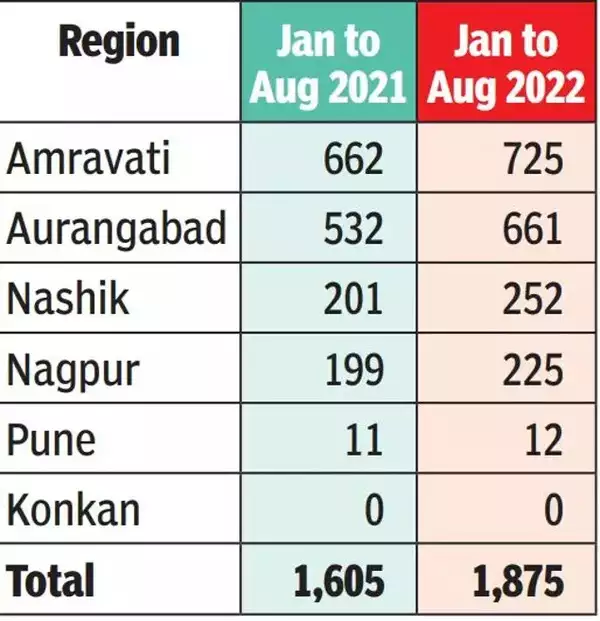

In [61]:
Image.open('Farmers.webp')

In [64]:
#Comparing the Sucide rate in Education Status With Respect to Gender an Age group
pred('Maharashtra',2021,'Type_code_Education_Status','Type_Hr. Secondary/Intermediate/Pre-Universit','M',6)
print('\n')
pred('Maharashtra',2021,'Type_code_Education_Status','Type_Hr. Secondary/Intermediate/Pre-Universit','F',6)

Type: Type_code_Education_Status 
Cause of death : Type_Hr. Secondary/Intermediate/Pre-Universit 
Year 2021 
Gender:M 
Expected deaths around : 834


Type: Type_code_Education_Status 
Cause of death : Type_Hr. Secondary/Intermediate/Pre-Universit 
Year 2021 
Gender:F 
Expected deaths around : 367


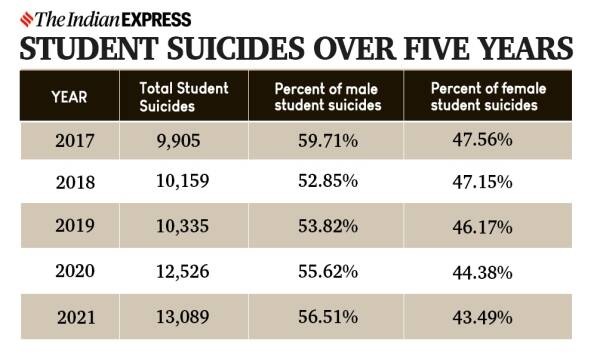

In [65]:
Image.open('StudentSuicides.jpg')

In [70]:
#Family problems with Middle Aged(30+)
pred('Maharashtra',2022,'Type_code_Social_Status','Type_Family Problems','M',3)
print('\n')
pred('Maharashtra',2022,'Type_code_Social_Status','Type_Family Problems','F',3)

Type: Type_code_Social_Status 
Cause of death : Type_Family Problems 
Year 2022 
Gender:M 
Expected deaths around : 1526


Type: Type_code_Social_Status 
Cause of death : Type_Family Problems 
Year 2022 
Gender:F 
Expected deaths around : 800


In [66]:
#Love Affairs(14-29)
pred('Maharashtra',2022,'Causes','Type_Love Affairs','M',2)
print('\n')
pred('Maharashtra',2022,'Causes','Type_Love Affairs','F',2)

Type: Causes 
Cause of death : Type_Love Affairs 
Year 2022 
Gender:M 
Expected deaths around : 1


Type: Causes 
Cause of death : Type_Love Affairs 
Year 2022 
Gender:F 
Expected deaths around : 20


In [67]:
#Dowry Dispute
pred('Maharashtra',2008,'Type_code_Causes','Type_Dowry Dispute','M',2)
print('\n')
pred('Maharashtra',2008,'Type_code_Causes','Type_Dowry Dispute','F',2)

Type: Type_code_Causes 
Cause of death : Type_Dowry Dispute 
Year 2008 
Gender:M 
Expected deaths around : 2


Type: Type_code_Causes 
Cause of death : Type_Dowry Dispute 
Year 2008 
Gender:F 
Expected deaths around : 25


In [69]:
#Probelms faced by Women as House Wife
pred('Maharashtra',2012,'Type_code_Causes','Type_House Wife','M',2)
print('\n')
pred('Maharashtra',2012,'Type_code_Causes','Type_House Wife','F',2)

Type: Type_code_Causes 
Cause of death : Type_House Wife 
Year 2012 
Gender:M 
Expected deaths around : 0


Type: Type_code_Causes 
Cause of death : Type_House Wife 
Year 2012 
Gender:F 
Expected deaths around : 1700


--------------------------------------------------------------------------------------

In [55]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [56]:
df10.columns[[df10.columns.str.startswith('Type_code_')][0]]

Index(['Type_code_Education_Status', 'Type_code_Means_adopted',
       'Type_code_Professional_Profile', 'Type_code_Social_Status'],
      dtype='object')

In [57]:
df10.columns[df10.columns.str.startswith('Type_')][4:]

Index(['Type_By Consuming Insecticides', 'Type_By Consuming Other Poison',
       'Type_By Drowning', 'Type_By Fire/Self Immolation', 'Type_By Hanging',
       'Type_By Over Alcoholism', 'Type_By Overdose of sleeping pills',
       'Type_By coming under running vehicles/trains',
       'Type_By touching electric wires',
       'Type_Cancellation/Non-Settlement of Marriage', 'Type_Cancer',
       'Type_Death of Dear Person', 'Type_Diploma', 'Type_Divorcee',
       'Type_Dowry Dispute', 'Type_Drug Abuse/Addiction',
       'Type_Failure in Examination', 'Type_Fall in Social Reputation',
       'Type_Family Problems', 'Type_Farming/Agriculture Activity',
       'Type_Graduate', 'Type_House Wife',
       'Type_Hr. Secondary/Intermediate/Pre-Universit',
       'Type_Illness (Aids/STD)', 'Type_Insanity/Mental Illness',
       'Type_Love Affairs', 'Type_Married', 'Type_Matriculate/Secondary',
       'Type_Middle', 'Type_Never Married', 'Type_No Education',
       'Type_Other Prolonged Illness'

Gender :'Male'->'M' 'Female'->'F'

Age Group: 

            0-14 -> 1 
            15-29 -> 2 
            30-44 -> 3 
            45-59 -> 4
            60+ -> 5
            0-100+ -> 6

        ---------------------------------------------------------
        | pred(state, year, type_code, type, gender, age_group) |
        ---------------------------------------------------------

In [ ]:
pred()